In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
sns.set()

# Constants

In [2]:
t1 = tf.constant(123)
t1

<tf.Tensor: shape=(), dtype=int32, numpy=123>

In [3]:
t1.numpy()

123

In [4]:
t2 = tf.constant([23,15], tf.float32)
t2.numpy()

array([23., 15.], dtype=float32)

In [5]:
t3 = tf.zeros([3,4], tf.int32)
t4 = tf.zeros_like(t3)
t4.numpy()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)

In [6]:
t5 = tf.eye(3)
t5.numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [7]:
t6 = tf.linspace(1, 10, 5)
t6.numpy()

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [8]:
# range excludes last element
t7 = tf.range(1, 10, 2)
t7.numpy()

array([1, 3, 5, 7, 9], dtype=int32)

## Constants distributions

### Normal Distribution
##### Probability of x is Highest in Center

In [9]:
t8 = tf.random.normal([3,6], mean=4.0, stddev=2, seed=1) # Random normal distribution with mean 4
t8.numpy()

array([[ 2.3773637 ,  6.9691973 ,  4.1306586 , -0.8854084 ,  4.198497  ,
         5.1824484 ],
       [ 5.185646  , -0.24585915,  2.5542054 ,  3.8874593 ,  5.2870893 ,
         3.4713519 ],
       [ 7.7132664 ,  5.1356835 ,  3.2343283 ,  1.0293133 ,  6.5235424 ,
         3.9493878 ]], dtype=float32)

In [10]:
np.mean(t8.numpy(), axis=0) # Mean by Column, some won't be close to 4.0

array([5.092092 , 3.9530075, 3.3063974, 1.3437881, 5.336376 , 4.2010627],
      dtype=float32)

In [11]:
np.mean(t8.numpy(), axis=1) # MEan by Row, close to 4.0

array([3.6621265, 3.3566487, 4.597587 ], dtype=float32)

In [12]:
np.mean(t8.numpy()) # Mean of all entries, close to 4.0

3.8721209

In [13]:
np.std(t8.numpy(), axis=1) # Standard deviation by Row, close to 2

array([2.4524138, 1.8703264, 2.187751 ], dtype=float32)

In [14]:
n8 = t8.numpy().flatten()

<AxesSubplot:ylabel='Count'>

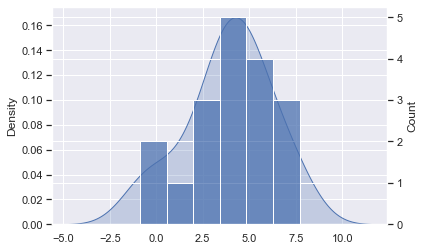

In [15]:
sns.kdeplot(n8, shade=True)
ax2 = plt.twinx()
sns.histplot(n8, ax=ax2)

In [16]:
# Use Variable with trainable=False for more efficient constants
c1 = tf.Variable(tf.zeros([100, 100]), trainable=False)
c1

<tf.Variable 'Variable:0' shape=(100, 100) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

### Uniform Distribution
##### Probability of x is constant

In [17]:
t9 = tf.random.uniform([3,6], maxval=4, seed=1)
n9 = t9.numpy().flatten()
n9

array([0.9561496 , 3.6815982 , 0.20204973, 1.9829779 , 3.3420892 ,
       0.10588169, 0.35245228, 1.8266416 , 3.075357  , 2.9505453 ,
       3.1401978 , 1.2481055 , 0.6074586 , 0.8110447 , 1.2335424 ,
       2.1605887 , 1.8038821 , 1.0127664 ], dtype=float32)

<AxesSubplot:ylabel='Count'>

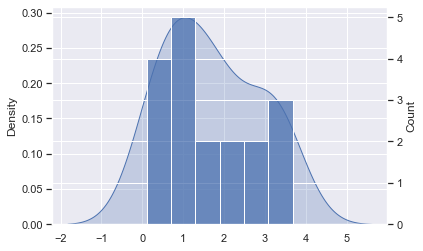

In [18]:
sns.kdeplot(n9, shade=True)
ax2 = plt.twinx()
sns.histplot(n9, ax=ax2)

# Variables

In [19]:
v1 = tf.Variable(tf.random.normal([3,3], stddev=3), name='v1')
v1

<tf.Variable 'v1:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.5659555 , -3.4653244 ,  1.5843469 ],
       [-2.9987328 , -2.829377  ,  1.4359994 ],
       [-2.880126  , -0.22317512, -8.472265  ]], dtype=float32)>

In [20]:
# Deprecated method. See below for newer way in Tensorflow 2.x
v2 = tf.compat.v1.get_variable("v2", [4,4], initializer=tf.ones_initializer)
v2

<tf.Variable 'v2:0' shape=(4, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [21]:
v3 = tf.Variable(tf.ones_initializer()(shape=[3,3], dtype=tf.int32), name="v2")
v3

<tf.Variable 'v2:0' shape=(3, 3) dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)>

# Placeholders

In [27]:
tf.compat.v1.disable_eager_execution()
sess = tf.compat.v1.InteractiveSession()
a = tf.compat.v1.placeholder(tf.int32, name='a')
b = tf.compat.v1.placeholder(tf.int32, name='b')
c = tf.math.multiply(a, b, name='c')
print(sess.run(c, feed_dict={a: 3, b: 4}))
sess.close()

12
